<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Image_Classification_with_Neural_Networks_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

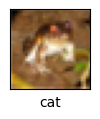

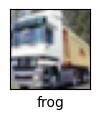

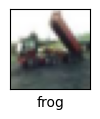

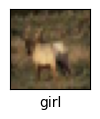

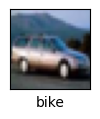

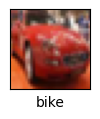

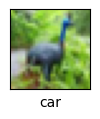

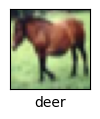

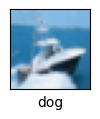

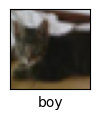

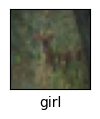

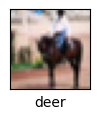

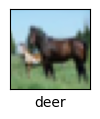

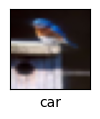

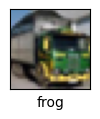

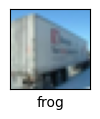

In [2]:
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(training_images,training_labels ),(testing_images,testing_labels) =datasets.cifar10.load_data()

training_images, testing_images = training_images/255, testing_images/255
class_names =['airplane','bike','car','boy','girl','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])
  plt.show()

In [2]:
training_images = training_images[:5000]
training_labels =training_labels[:5000]
testing_images= testing_images[:1500]
testing_labels=testing_labels[:1500]

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2352 - loss: 2.0977 - val_accuracy: 0.3400 - val_loss: 1.8094
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.3994 - loss: 1.6548 - val_accuracy: 0.4620 - val_loss: 1.5331
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5060 - loss: 1.3793 - val_accuracy: 0.4560 - val_loss: 1.4693
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.5513 - loss: 1.2640 - val_accuracy: 0.4967 - val_loss: 1.3816
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6216 - loss: 1.0710 - val_accuracy: 0.4973 - val_loss: 1.3725
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6673 - loss: 0.9703 - val_accuracy: 0.5207 - val_loss: 1.3618
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7176 - loss: 0.8287 - val_accuracy: 0.5340 - val_loss: 1.3601
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7667 - loss: 0.6863 - val_

In [3]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5353 - loss: 1.5455
Loss: 1.5182125568389893
Accuracy: 0.5440000295639038


In [5]:
model.save("image_classifier.keras")


In [4]:
model=models.load_model("image_classifier.keras")

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    # Other layers
    Dense(3897792, activation='relu'),  # Adjust the units if necessary
    # Other layers
])


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 10816, but received input with shape (1, 2007872)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 280, 464, 3), dtype=float32)
  • training=False
  • mask=None

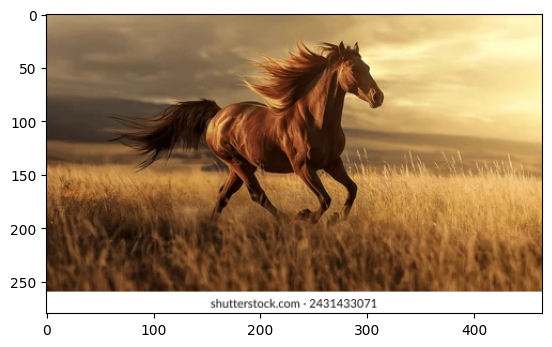

In [6]:
import cv2 as cv
from cv2 import cvtColor
img=cv.imread("horse.webp")
img=cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img,cmap=plt.cm.binary)

prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(f"prediction is : {class_names[index]}")
plt.show()